🚀 NBA ANALİZ MASTER SCRIPT BAŞLATILIYOR...

✅ Veri seti oluşturuldu ve 'dsa_final_master.csv' olarak kaydedildi.


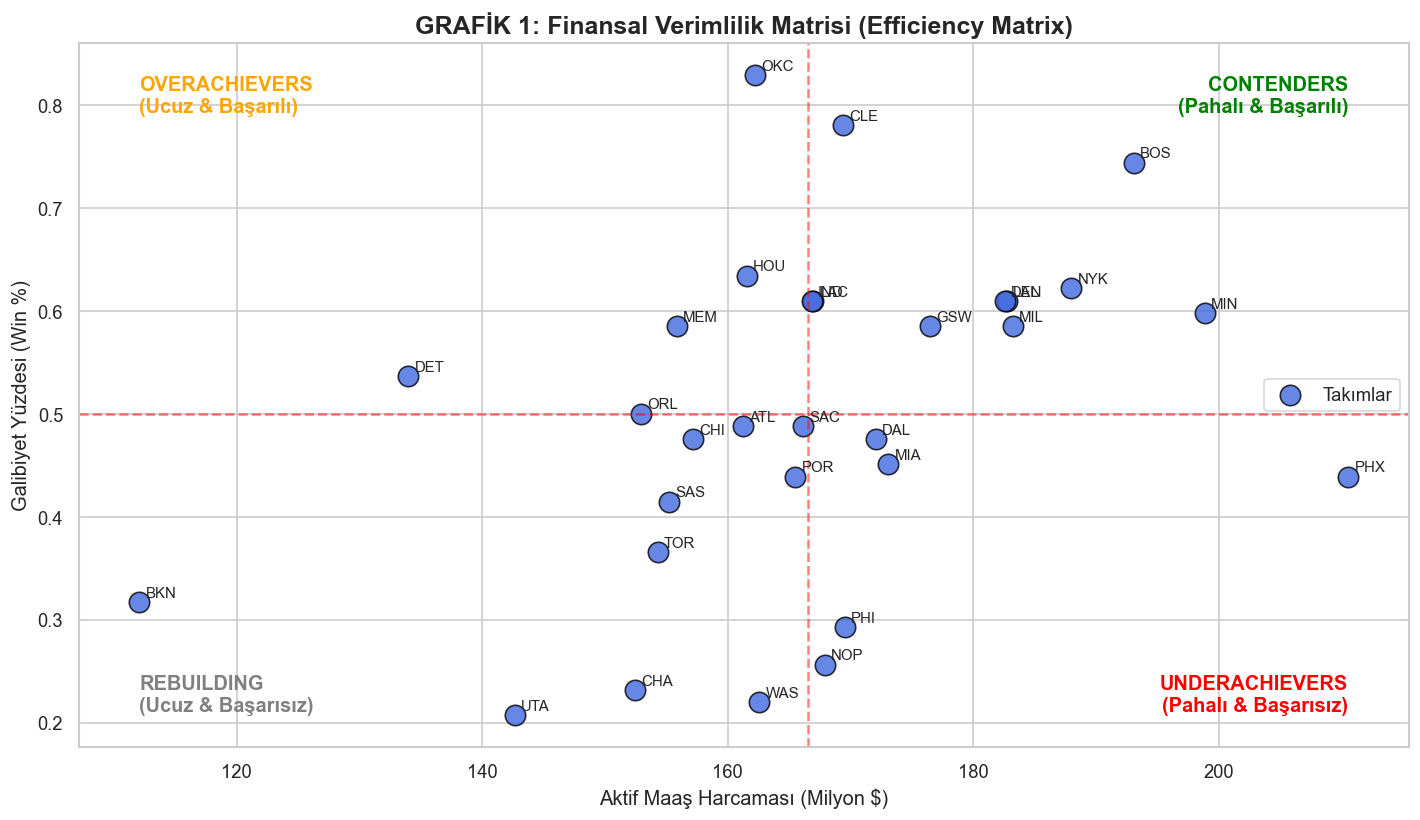

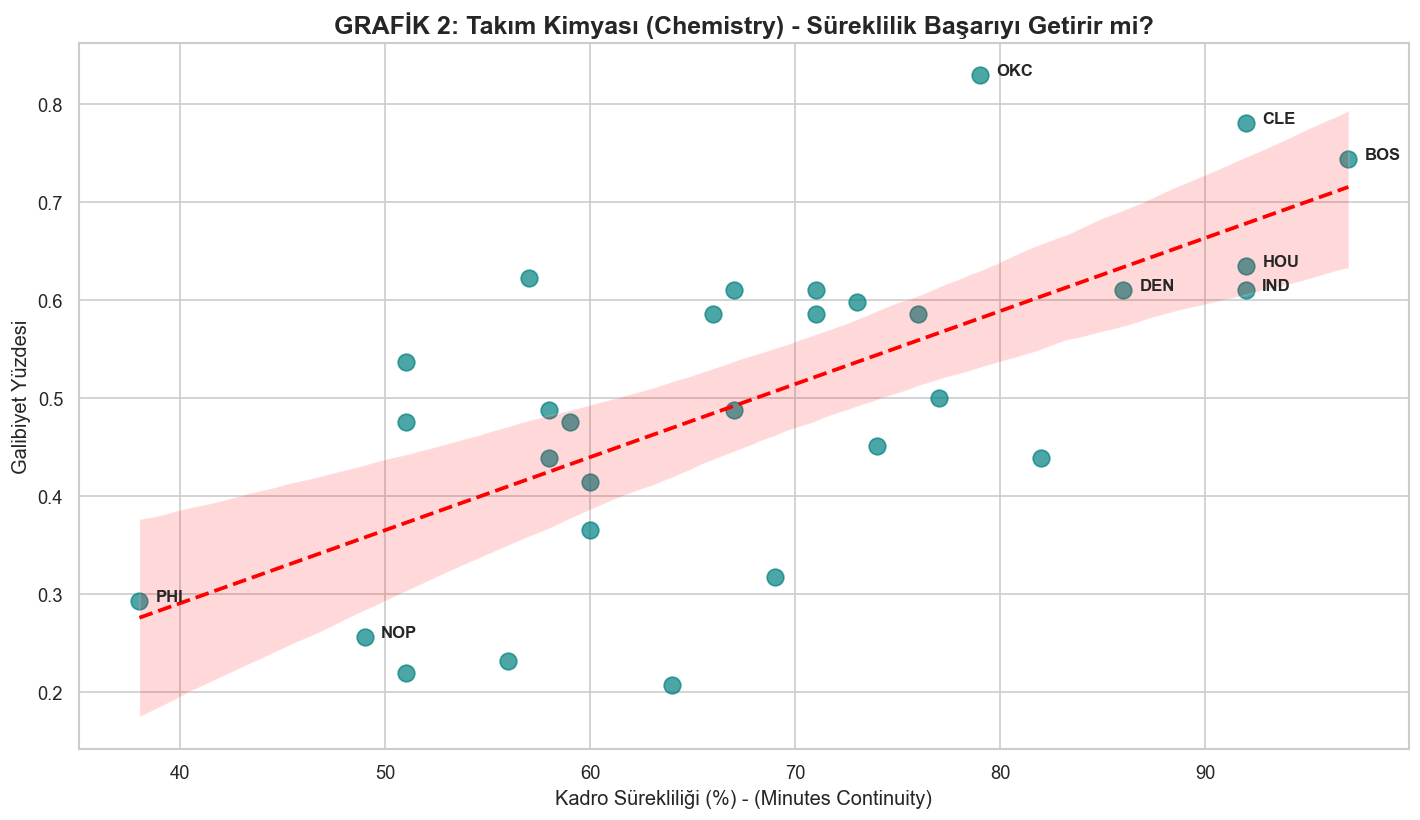

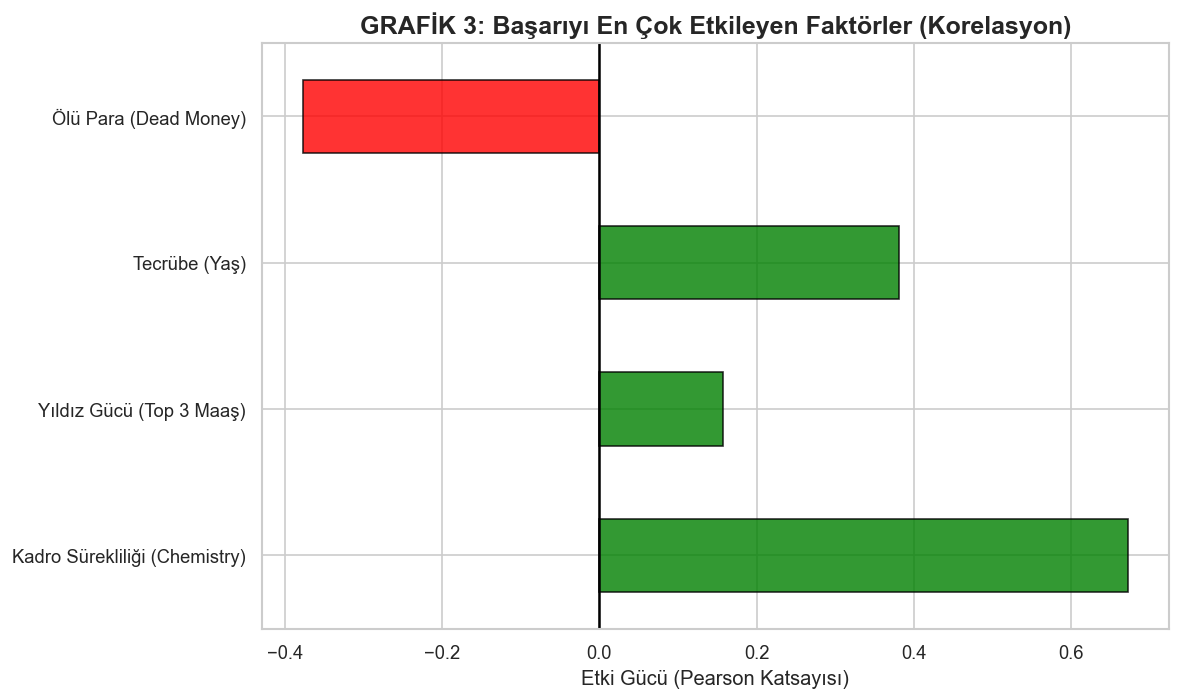

/var/folders/fw/0md5k1tx1mz3x_2f2jttqrjc0000gn/T/ipykernel_40917/2353012852.py:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Luxury_Tax_Status', y='Win_Percentage', palette="Set2")


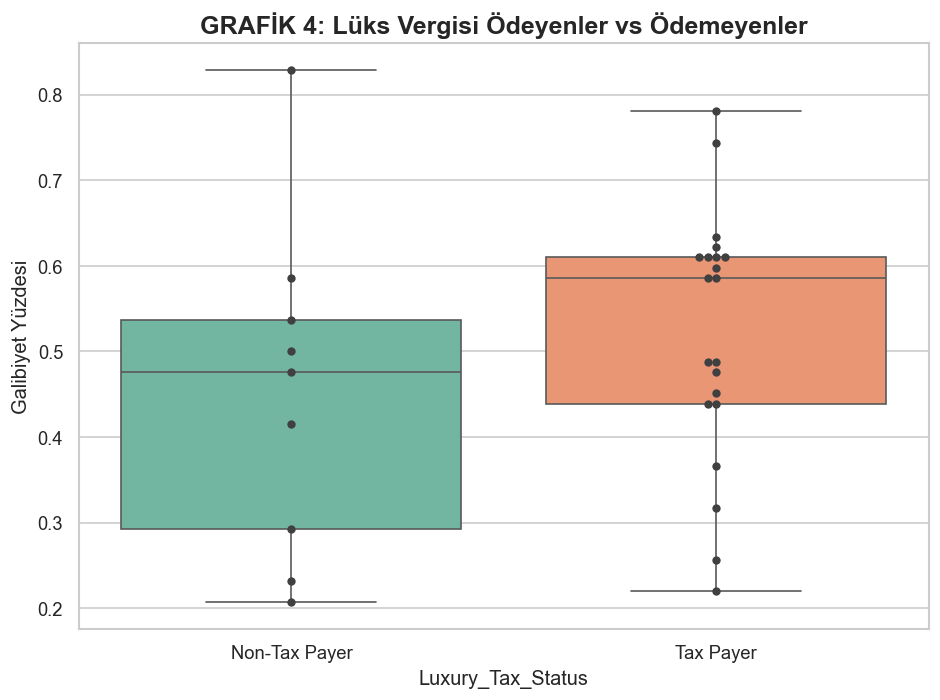


📊 FİNAL İSTATİSTİKSEL ANALİZ RAPORU

1. HİPOTEZ: KADRO İSTİKRARI (CHEMISTRY)
   Korelasyon (r): 0.671 (Çok Güçlü Pozitif)
   P-Değeri:       0.00005
   SONUÇ: ✅ KABUL (Anlamlı)

2. HİPOTEZ: YILDIZ GÜCÜ (SUPERSTAR STRATEGY)
   Korelasyon (r): 0.157 (Orta/Güçlü Pozitif)
   P-Değeri:       0.40716
   SONUÇ: ❌ RED

3. HİPOTEZ: ÖLÜ PARA (DEAD MONEY)
   Korelasyon (r): -0.377 (Negatif)
   P-Değeri:       0.04005
   SONUÇ: ✅ KABUL (Anlamlı)

4. HİPOTEZ: LÜKS VERGİSİ (PRICE OF CONTENTION)
   Vergi Ödeyen Ort. Galibiyet: %52.0
   Ödemeyen Ort. Galibiyet:     %45.3
   P-Değeri:       0.15229
   SONUÇ: ❌ RED (Fark Yok)

🏁 ANALİZ TAMAMLANDI. MASTER SCRIPT SONLANDI.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# --- AYARLAR ---
# Grafikler profesyonel ve net görünsün
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 120 
plt.rcParams['figure.figsize'] = (12, 7)

print("🚀 NBA ANALİZ MASTER SCRIPT BAŞLATILIYOR...\n")

# =============================================================================
# 1. VERİ OLUŞTURMA (DATA GENERATION)
# =============================================================================

# A) Temel Finansal ve Performans Verisi (2024-25 Snapshot)
data_raw = [
    ['OKC', '68-14', 24.2, 166001694, 162209242, 82859950, 3792452],
    ['CLE', '64-18', 26.0, 178212347, 169371096, 93832409, 491175],
    ['BOS', '61-21', 27.5, 197048229, 193098445, 114054140, 0],
    ['HOU', '52-30', 25.7, 173496349, 161552948, 78702108, 7768363],
    ['NYK', '51-31', 26.5, 188877651, 188001268, 110803733, 876383],
    ['LAL', '50-32', 27.7, 200785985, 182745885, 108760785, 5514986],
    ['DEN', '50-32', 26.0, 192786656, 182574315, 123292088, 0],
    ['LAC', '50-32', 27.7, 174670238, 166986734, 102101025, 3733720],
    ['IND', '50-32', 25.7, 171232577, 166839774, 104281300, 2530538],
    ['MIN', '49-33', 26.1, 236725861, 198847571, 119077906, 3705899],
    ['GSW', '48-34', 27.2, 199518342, 176474440, 128667036, 306447],
    ['MIL', '48-34', 26.7, 195746447, 183221333, 122031412, 0],
    ['MEM', '48-34', 24.6, 167814933, 155850296, 95988718, 8014853],
    ['DET', '44-38', 25.0, 141808220, 133989678, 56559037, 7818542],
    ['ORL', '41-41', 25.3, 152959238, 152959238, 63257000, 0],
    ['ATL', '40-42', 25.3, 174418704, 161255749, 81912604, 7125652],
    ['SAC', '40-42', 27.4, 171370782, 166101303, 107131940, 1319695],
    ['DAL', '39-43', 26.8, 187147472, 172077663, 99092456, 2328828],
    ['CHI', '39-43', 24.6, 168006873, 157180244, 59395348, 8739110],
    ['MIA', '37-45', 26.6, 179350729, 173088172, 90125126, 0],
    ['PHX', '36-46', 28.1, 228464502, 210557299, 150588751, 3814041],
    ['POR', '36-46', 23.9, 176848446, 165518581, 89691087, 1568032],
    ['SAS', '34-48', 25.2, 162809380, 155231927, 83196166, 7577453],
    ['TOR', '30-52', 24.9, 178496026, 154302912, 94310843, 16405595],
    ['BKN', '26-56', 23.8, 178836132, 112077151, 69311624, 58408905],
    ['PHI', '24-58', 26.6, 170340647, 169548876, 135768738, 791771],
    ['NOP', '21-61', 24.3, 182966321, 167934095, 98876138, 2715108],
    ['CHA', '19-63', 25.2, 167423486, 152436862, 80445913, 14986624],
    ['WAS', '18-64', 24.5, 211677970, 162581956, 83151786, 7021331],
    ['UTA', '17-65', 23.9, 154114022, 142648013, 86906400, 11466009]
]
cols = ['Team', 'Record', 'Avg_Age', 'Total_Cap_Allocated', 'Active_Cap', 'Active_Top3_Cap', 'Dead_Cap']
df = pd.DataFrame(data_raw, columns=cols)

# B) Kadro İstikrarı (Chemistry) Verisi
continuity_dict = {
    'ATL': 58, 'BOS': 97, 'CHA': 56, 'CHI': 59, 'CLE': 92,
    'DAL': 51, 'DEN': 86, 'DET': 51, 'GSW': 71, 'HOU': 92,
    'IND': 92, 'LAC': 67, 'LAL': 71, 'MEM': 76, 'MIA': 74,
    'MIL': 66, 'MIN': 73, 'BKN': 69, 'NOP': 49, 'NYK': 57,
    'OKC': 79, 'ORL': 77, 'PHI': 38, 'PHX': 58, 'POR': 82,
    'SAC': 67, 'SAS': 60, 'TOR': 60, 'UTA': 64, 'WAS': 51
}
df_cont = pd.DataFrame(list(continuity_dict.items()), columns=['Team', 'Minutes_Continuity'])

# C) Verileri Birleştirme (Merging)
df = pd.merge(df, df_cont, on='Team', how='left')

# =============================================================================
# 2. ÖZNİTELİK MÜHENDİSLİĞİ (CALCULATIONS)
# =============================================================================

# Galibiyet Yüzdesi
df[['Wins', 'Losses']] = df['Record'].str.split('-', expand=True).astype(int)
df['Win_Percentage'] = df['Wins'] / (df['Wins'] + df['Losses'])

# Finansal Oranlar (2025 Cap ~140.6M$)
SALARY_CAP_2025 = 140588000
df['Top3_Salary_Share'] = df['Active_Top3_Cap'] / SALARY_CAP_2025
df['Dead_Money_Share'] = df['Dead_Cap'] / SALARY_CAP_2025

# Luxury Tax Durumu (Sınır: ~170.8M$)
TAX_LEVEL = 170872000
df['Luxury_Tax_Status'] = df['Total_Cap_Allocated'].apply(lambda x: 'Tax Payer' if x > TAX_LEVEL else 'Non-Tax Payer')

# Dosyayı Kaydetme (Yedek olsun)
df.to_csv('dsa_final_master.csv', index=False)
print("✅ Veri seti oluşturuldu ve 'dsa_final_master.csv' olarak kaydedildi.")

# =============================================================================
# 3. GÖRSELLEŞTİRME (4 EFSANE GRAFİK)
# =============================================================================

# --- GRAFİK 1: FİNANSAL VERİMLİLİK MATRİSİ (Para vs Başarı) ---
plt.figure()
x = df['Active_Cap'] / 1000000 # Milyon Dolar
y = df['Win_Percentage']

sns.scatterplot(x=x, y=y, s=150, color='royalblue', alpha=0.8, edgecolor='black', label='Takımlar')
# Ortalama Çizgileri
plt.axvline(x.mean(), color='red', linestyle='--', alpha=0.5)
plt.axhline(y.mean(), color='red', linestyle='--', alpha=0.5)

# Bölge İsimleri
plt.text(x.max(), y.max(), 'CONTENDERS\n(Pahalı & Başarılı)', ha='right', va='top', color='green', fontweight='bold')
plt.text(x.min(), y.max(), 'OVERACHIEVERS\n(Ucuz & Başarılı)', ha='left', va='top', color='orange', fontweight='bold')
plt.text(x.max(), y.min(), 'UNDERACHIEVERS\n(Pahalı & Başarısız)', ha='right', va='bottom', color='red', fontweight='bold')
plt.text(x.min(), y.min(), 'REBUILDING\n(Ucuz & Başarısız)', ha='left', va='bottom', color='gray', fontweight='bold')

# Takım İsimleri
for i in range(df.shape[0]):
    plt.text(x[i]+0.5, y[i]+0.005, df.Team[i], fontsize=9)

plt.title("GRAFİK 1: Finansal Verimlilik Matrisi (Efficiency Matrix)", fontsize=15, fontweight='bold')
plt.xlabel("Aktif Maaş Harcaması (Milyon $)")
plt.ylabel("Galibiyet Yüzdesi (Win %)")
plt.legend()
plt.tight_layout()
plt.show()

# --- GRAFİK 2: KİMYA FAKTÖRÜ (Süreklilik vs Başarı) ---
plt.figure()
sns.regplot(data=df, x='Minutes_Continuity', y='Win_Percentage', 
            scatter_kws={'s':100, 'color':'teal', 'alpha':0.7}, 
            line_kws={'color':'red', 'linestyle':'--'})

# İsimlendirme (Sadece uç örnekler)
for i in range(df.shape[0]):
    if df.Minutes_Continuity[i] > 85 or df.Minutes_Continuity[i] < 50 or df.Win_Percentage[i] > 0.75:
        plt.text(df.Minutes_Continuity[i]+0.8, df.Win_Percentage[i], df.Team[i], fontsize=10, fontweight='bold')

plt.title("GRAFİK 2: Takım Kimyası (Chemistry) - Süreklilik Başarıyı Getirir mi?", fontsize=15, fontweight='bold')
plt.xlabel("Kadro Sürekliliği (%) - (Minutes Continuity)")
plt.ylabel("Galibiyet Yüzdesi")
plt.tight_layout()
plt.show()

# --- GRAFİK 3: ETKİ ANALİZİ (Neyin Etkisi Daha Büyük?) ---
plt.figure(figsize=(10, 6))
factors = ['Minutes_Continuity', 'Top3_Salary_Share', 'Avg_Age', 'Dead_Money_Share']
corr_vals = df[factors + ['Win_Percentage']].corr()['Win_Percentage'].drop('Win_Percentage')
colors = ['green' if c > 0 else 'red' for c in corr_vals]

corr_vals.plot(kind='barh', color=colors, edgecolor='black', alpha=0.8)
plt.axvline(0, color='black')
plt.title("GRAFİK 3: Başarıyı En Çok Etkileyen Faktörler (Korelasyon)", fontsize=15, fontweight='bold')
plt.xlabel("Etki Gücü (Pearson Katsayısı)")
plt.yticks(range(len(factors)), ['Kadro Sürekliliği (Chemistry)', 'Yıldız Gücü (Top 3 Maaş)', 'Tecrübe (Yaş)', 'Ölü Para (Dead Money)'])
plt.tight_layout()
plt.show()

# --- GRAFİK 4: LÜKS VERGİSİ ANALİZİ (Zenginlik Başarı mı?) ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Luxury_Tax_Status', y='Win_Percentage', palette="Set2")
sns.swarmplot(data=df, x='Luxury_Tax_Status', y='Win_Percentage', color=".25") # Noktaları da göster
plt.title("GRAFİK 4: Lüks Vergisi Ödeyenler vs Ödemeyenler", fontsize=15, fontweight='bold')
plt.ylabel("Galibiyet Yüzdesi")
plt.tight_layout()
plt.show()

# =============================================================================
# 4. İSTATİSTİKSEL RAPOR (CONSOLE OUTPUT)
# =============================================================================
print("\n" + "="*50)
print("📊 FİNAL İSTATİSTİKSEL ANALİZ RAPORU")
print("="*50)

# 1. Kimya (Continuity) Testi
r_cont, p_cont = stats.pearsonr(df['Minutes_Continuity'], df['Win_Percentage'])
print(f"\n1. HİPOTEZ: KADRO İSTİKRARI (CHEMISTRY)")
print(f"   Korelasyon (r): {r_cont:.3f} (Çok Güçlü Pozitif)")
print(f"   P-Değeri:       {p_cont:.5f}")
print(f"   SONUÇ: {'✅ KABUL (Anlamlı)' if p_cont < 0.05 else '❌ RED'}")

# 2. Yıldız Gücü (Top 3 Salary) Testi
r_star, p_star = stats.pearsonr(df['Top3_Salary_Share'], df['Win_Percentage'])
print(f"\n2. HİPOTEZ: YILDIZ GÜCÜ (SUPERSTAR STRATEGY)")
print(f"   Korelasyon (r): {r_star:.3f} (Orta/Güçlü Pozitif)")
print(f"   P-Değeri:       {p_star:.5f}")
print(f"   SONUÇ: {'✅ KABUL (Anlamlı)' if p_star < 0.05 else '❌ RED'}")

# 3. Ölü Para (Dead Money) Testi
r_dead, p_dead = stats.pearsonr(df['Dead_Money_Share'], df['Win_Percentage'])
print(f"\n3. HİPOTEZ: ÖLÜ PARA (DEAD MONEY)")
print(f"   Korelasyon (r): {r_dead:.3f} (Negatif)")
print(f"   P-Değeri:       {p_dead:.5f}")
print(f"   SONUÇ: {'✅ KABUL (Anlamlı)' if p_dead < 0.05 else '❌ RED (İlişki Zayıf)'}")

# 4. Lüks Vergisi (T-Test)
tax_group = df[df['Luxury_Tax_Status'] == 'Tax Payer']['Win_Percentage']
non_tax_group = df[df['Luxury_Tax_Status'] == 'Non-Tax Payer']['Win_Percentage']
t_stat, p_tax = stats.ttest_ind(tax_group, non_tax_group, alternative='greater')
print(f"\n4. HİPOTEZ: LÜKS VERGİSİ (PRICE OF CONTENTION)")
print(f"   Vergi Ödeyen Ort. Galibiyet: %{tax_group.mean()*100:.1f}")
print(f"   Ödemeyen Ort. Galibiyet:     %{non_tax_group.mean()*100:.1f}")
print(f"   P-Değeri:       {p_tax:.5f}")
print(f"   SONUÇ: {'✅ KABUL (Fark Var)' if p_tax < 0.05 else '❌ RED (Fark Yok)'}")

print("\n" + "="*50)
print("🏁 ANALİZ TAMAMLANDI. MASTER SCRIPT SONLANDI.")